### Data ScienceTech Institute (DSTI)
***Metaheuristic Optimization***

___


# One Ticket, One Day, and all Parisian Metro Stations to see... GO!

___

# *1. Project Description*


## 1.1. Goal:

- The goal is to pass through all the [metro stations in Paris](https://www.ratp.fr/plan-metro) within a day.

## 1.2. Rules:
- You have to go through at least once (though not necessarily just once) by each of the Paris metro stations intramural, during a day;
- Authorized transportations are: the metro (however, the use of the bus, a car or a taxi, or even a bicycle, is prohibited);
- It is not necessary to browse the metro stations located outside the limits of Paris (it stops at stations with names in "porte...");
- It is NOT forbidden to leave Paris (eg. by going to the Boulogne Jean Jaurès station, which has an interest);
- If a station is crossed by several lines, it is not necessary (but not prohibited) to go as many times as there are lines that pass by;
- There is no need to stop at each station: cross enough;
- Finally, two stations are considered different if they have different names (including Châtelet is not the same station as Les Halles).

# *2. Proposed solution*

This work will focus mainly on finding the fastest path that allows us to visit all metro stations, at least once, and including metro stations with the same name (example: Bastille Line 1 and Bastille Line 8). This path should take at most 10 hours, as the Parisian Metro opens from 5am to 1am.

To accomplish this, we will revisit the [Chinese postman problem](https://en.wikipedia.org/wiki/Route_inspection_problem) (CPP), a.k.a route inspection problem. Here, the goal is to find the fasted closed path or circuit that visits all edges, represented here as station transfers.

The metro network can be seen as a fully connected undirected graph (except end-loops in lines 7b and 10). If every node (metro station) of this graph has a even degree (it connects to an even number of other nodes), than there is an optimal solution that visits every edge once. This optimal solution is called an [Eulerian circuit](https://en.wikipedia.org/wiki/Eulerian_path).

The CPP consists in transforming an non-Eulerian graph into an Eulerian graph, by:
- identifying all possible combinations of odd degree nodes;
- finding the mininal legth path between every odd degree node (here we use the [Dijkstra algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm));
- adding the minimal length odd degree nodes to the original graph - making every node an even degree node.

# *3. Hands-On-Approach*

# 3.1. Import main libraries

In [1]:
import pandas as pd
import numpy as np
#import math
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx # NetWorkX 2.0 (some algorithms have different output types in newer versions)
import itertools
from os import getcwd
dir = getcwd()

# 3.2. Load the data into nodes (vertices) with edges (links)
- The orignal data was divided into two distinct *.csv* files, corresponding to nodes and edges;
- The line references and respective colors were added manually;
- The transfers between same station names were defined as *'origin_destination'*, and colored black (for example: *'5_2'*);
- The non-intramural stations were removed, with the exception of Boulogne-Jean-Jaurès station, since it possesses a loop that will help us reduce the number of retracing trips.
- Finally, the two end-loops in lines 7b and 10 will be removed, to make this network a fully connected undirected graph (the time needed to visit these two end-loops will then be added to the final results). 

## 3.2.1. Edges (metro transfers):

In [2]:
# Undirected graph
edgelist = pd.read_csv(dir+"\\data\\attributes_Edges_Graph.csv", sep=",")
edgelist.head()

,node1,node2,time,line,color
0,0,238,41,12,darkgreen
1,0,159,46,12,darkgreen
2,1,12,36,2,blue
3,1,235,44,2,blue
4,2,110,69,9,olive


In [3]:
# Loop in line 7b
edgelist_7b = pd.read_csv(dir+"\\data\\attributes_Edges_DiGraph_7b.csv", sep=",")
# Loop in line 10
edgelist_10 = pd.read_csv(dir+"\\data\\attributes_Edges_DiGraph_10.csv", sep=",")

## 3.2.2. Nodes (metro stations):

In [4]:
# Undirected graph
nodelist = pd.read_csv(dir+"\\data\\attributes_Vertices_Graph.csv", sep=",", encoding='latin-1')
nodelist.head()

,id,X,Y,name,line
0,0,0,0,Abbesses,12
1,1,0,0,Alexandre Dumas,2
2,2,0,0,Alma Marceau,9
3,3,0,0,Alésia,4
4,5,0,0,Anvers,2


In [5]:
# Loop in line 7b
nodelist_7b = pd.read_csv(dir+"\\data\\attributes_Vertices_DiGraph_7b.csv", sep=",", encoding='latin-1')
# Loop in line 10
nodelist_10 = pd.read_csv(dir+"\\data\\attributes_Vertices_DiGraph_10.csv", sep=",", encoding='latin-1')

# 3.3. Create a temporary graph for (X,Y) coordinates extraction:
   - Since the metro stations with multiple lines have the same geographical coordinates, we cannot use the real coordinates to plot the metro network;
   - The distance between the same metro station, distinct line, has to be considered;
   - "Virtual" (X,Y) coordinates, taking into consideration the time to switch lines, are going to be generated from the Weighted Edges graph.

## 3.3.1. Create the graph using the Nodes, Edges and Weight ('time'):

In [6]:
# Undirected graph
G_weighted = nx.Graph()
G_weighted.add_nodes_from(nodelist['id'].values)
G_weighted.add_weighted_edges_from(edgelist[['node1', 'node2', 'time']].values) # 'time' as each edge weight

In [7]:
# Loop in line 7b
G_7b = nx.DiGraph()
G_7b.add_nodes_from(nodelist_7b['id'].values)
G_7b.add_weighted_edges_from(edgelist_7b[['node1', 'node2', 'time']].values) # 'time' as each edge weight

# Loop in line 10
G_10 = nx.DiGraph()
G_10.add_nodes_from(nodelist_10['id'].values)
G_10.add_weighted_edges_from(edgelist_10[['node1', 'node2', 'time']].values) # 'time' as each edge weight

## 3.3.2. Compute node positions using [Kamada-Kawai layout cost function](https://en.wikipedia.org/wiki/Force-directed_graph_drawing):

In [8]:
# Define "virtual" weighted node positions
# Undirected graph
node_positions = nx.kamada_kawai_layout(G_weighted)
node_positions_XY = np.array(list((nx.kamada_kawai_layout(G_weighted)).values()))[:,0:2]

# Loop in line 7b
node_positions_7b = nx.kamada_kawai_layout(G_7b)
node_positions_XY_7b = np.array(list((nx.kamada_kawai_layout(G_7b)).values()))[:,0:2]
# Loop in line 10
node_positions_10 = nx.kamada_kawai_layout(G_10)
node_positions_XY_10 = np.array(list((nx.kamada_kawai_layout(G_10)).values()))[:,0:2]

## 3.3.3. Add the (X,Y) to the nodes table:

In [9]:
# Undirected graph
nodelist['X'] = pd.to_numeric(node_positions_XY[:,0]*100)
nodelist['Y'] = pd.to_numeric(node_positions_XY[:,1]*100)
nodelist.head()
# Loop in line 7b
nodelist_7b['X'] = pd.to_numeric(node_positions_XY_7b[:,0]*100)
nodelist_7b['Y'] = pd.to_numeric(node_positions_XY_7b[:,1]*100)
# Loop in line 10
nodelist_10['X'] = pd.to_numeric(node_positions_XY_10[:,0]*100)
nodelist_10['Y'] = pd.to_numeric(node_positions_XY_10[:,1]*100)

In [10]:
if nx.is_eulerian(G_weighted) == False:
    print("The Parisian metro network graph is *NOT* an Eulerian graph...")
    print("Proceed with CPP!")
else:
    print("The Metro network graph is an Eulerian graph!")

The Parisian metro network graph is *NOT* an Eulerian graph...
Proceed with CPP!


# 3.4. Metro network *"representation"*:

## 3.4.1. Define a new network and add the edges and nodes to it:

In [11]:
# Undirected graph
g = nx.Graph() # New graphic for metro network visualization

# Add edges (origin-destination) and edge attributes (line/transfer, time between stations, color):
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], **elrow[2:].to_dict())
# Preview first 5 edges
print("Preview of edges format: \n", list(g.edges(data=True))[0:5] )
print("(...)\n--> The total number of edges is: {}".format(g.number_of_edges()))

# Add node "virtual" (X,Y) coordinates:
for i, nlrow in nodelist.iterrows():
    nx.set_node_attributes(g, {nlrow['id']:  nlrow[1:].to_dict()}) 
# Preview first 2 nodes
print("\nPreview of nodes format: \n", list(g.nodes(data=True))[0:2] )
print("(...)\n--> The total number nodes (intramural metro stations) is: {}".format(g.number_of_nodes()))

Preview of edges format: 
 [(0, 238, {'time': 41, 'line': '12', 'color': 'darkgreen'}), (0, 159, {'time': 46, 'line': '12', 'color': 'darkgreen'}), (238, 322, {'time': 27, 'line': '12', 'color': 'darkgreen'}), (238, 239, {'time': 120, 'line': '2_12', 'color': 'black'}), (159, 147, {'time': 44, 'line': '12', 'color': 'darkgreen'})]
(...)
--> The total number of edges is: 404

Preview of nodes format: 
 [(0, {'X': 52.75603361581634, 'Y': -37.166261394542985, 'name': 'Abbesses', 'line': '12'}), (238, {'X': 49.34898766957141, 'Y': -32.28759493867594, 'name': 'Pigalle', 'line': '12'})]
(...)
--> The total number nodes (intramural metro stations) is: 313


**Undirected part of the graph:** We have a total of 404 possible metro changes (undirected) and 313 metro stations.

## 3.4.2. Define a new network for loops, the same way:

In [12]:
# End-loops line 7b and 10, Directed graphs:
g_7b = nx.DiGraph()
g_10 = nx.DiGraph()

# Add edges to end-loop from line 7b:
for i, elrow in edgelist_7b.iterrows():
    g_7b.add_edge(elrow[0], elrow[1], **elrow[2:].to_dict())
# Add node "virtual" (X,Y) coordinates to end-loop from line 7b:
for i, nlrow in nodelist_7b.iterrows():
    nx.set_node_attributes(g_7b, {nlrow['id']:  nlrow[1:].to_dict()}) 

    
# Add edges to end-loop from line 10:
for i, elrow in edgelist_10.iterrows():
    g_10.add_edge(elrow[0], elrow[1], **elrow[2:].to_dict())
# Add node "virtual" (X,Y) coordinates to end-loop from line 10:
for i, nlrow in nodelist_10.iterrows():
    nx.set_node_attributes(g_10, {nlrow['id']:  nlrow[1:].to_dict()}) 

## 3.4.3. Plot the approximated metro network, with colors:

C:\Users\migue\.conda\envs\FinalProject_METAheu_Metro_TSM\lib\site-packages\networkx\drawing\nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


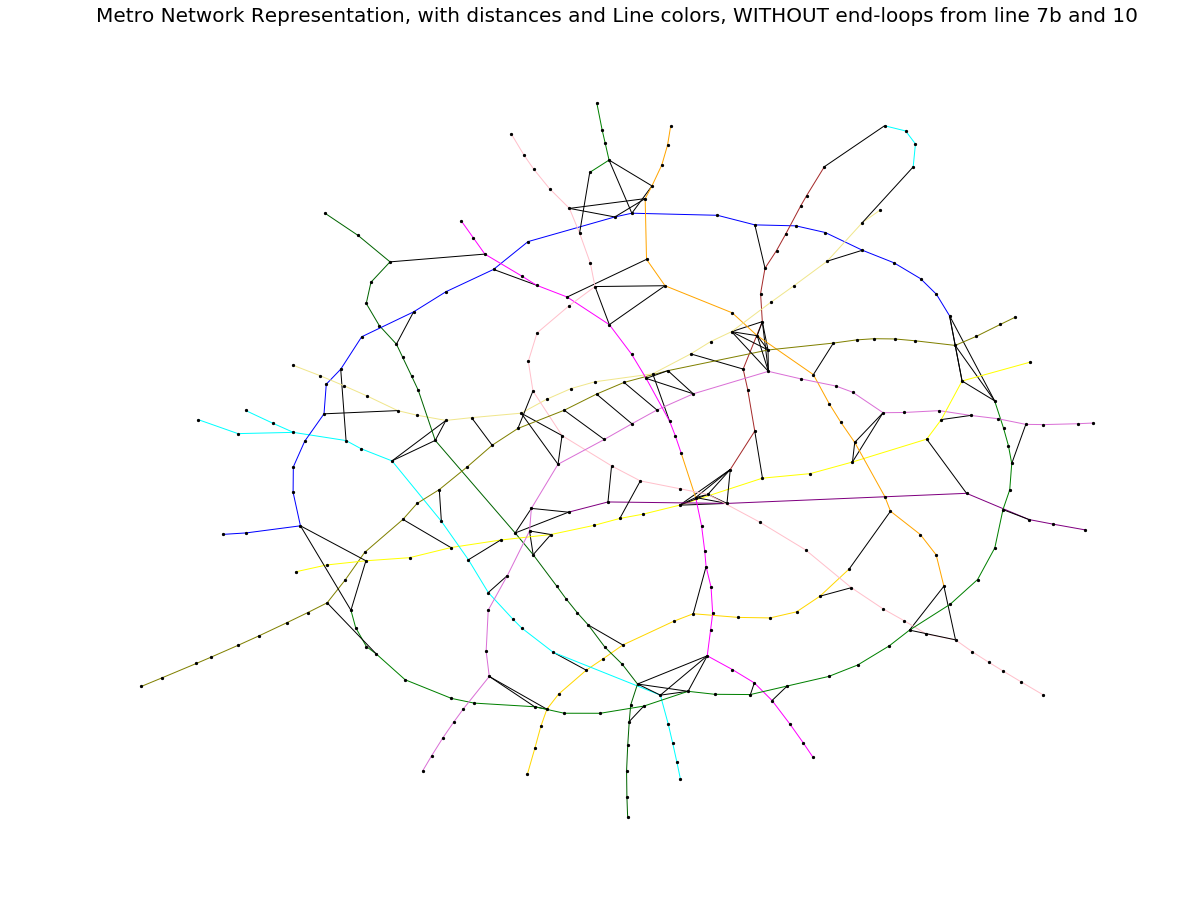

In [13]:
# Define node positions for plotting
node_positions = {node[0]: (-node[1]['X'], -node[1]['Y']) for node in g.nodes(data=True)} # Multiplied both axis by -1 just for approximation with the Parisian metro layout

# Define data structure (list) of edge colors
edge_colors = [e[2]['color'] for e in list(g.edges(data=True))]

# Plot the result approximation the metro network, undirected graph
plt.figure(figsize=(16, 12))
nx.draw(g, pos=node_positions, edge_color=edge_colors, node_size=5, node_color='black')
plt.title('Metro Network Representation, with distances and Line colors, WITHOUT end-loops from line 7b and 10', size=20)
plt.show()

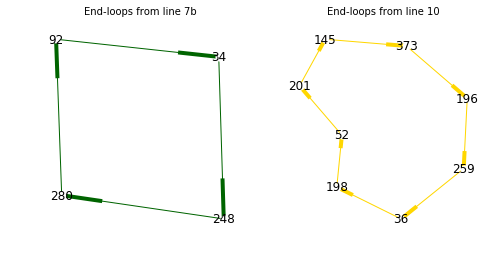

In [14]:
# Plot end-loops from lines 7b and 10
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
nx.draw(g_7b, node_size=50, edge_color='darkgreen', node_color='white', with_labels=True)
plt.title('End-loops from line 7b', size=10)

plt.subplot(1, 2, 2)
nx.draw(g_10, node_size=50, edge_color='gold',node_color='white', with_labels=True)
plt.title('End-loops from line 10', size=10)

plt.show()

# *4. Transform the non-Eulerian graph into an Eulerian graph*

The CPP consists in transforming an non-Eulerian graph into an Eulerian graph, by:
- identifying all possible combinations of odd degree nodes;
- finding the mininal legth path between every odd degree node (here we use the [Dijkstra algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm));
- adding the minimal length odd degree nodes to the original graph - making every node an even degree node.

# 4.1. Identify all possible combinations of odd degree nodes:

In [15]:
nodes_odd_degree = [v for v, d in g.degree() if d % 2 == 1]
print('Number of nodes of odd degree: {}'.format(len(nodes_odd_degree)))
print('Number of total nodes: {}'.format(len(g.nodes())))

Number of nodes of odd degree: 106
Number of total nodes: 313


In [16]:
odd_node_pairs = list(itertools.combinations(nodes_odd_degree, 2))
print('Number of pairs: {}'.format(len(odd_node_pairs)))

Number of pairs: 5565


# 4.2. Find the mininal legth path between every odd degree node

In [17]:
def get_shortest_paths_distances(graph, pairs, edge_weight_name):
    """Compute shortest distance between each pair of nodes in a graph.  Return a dictionary keyed on node pairs (tuples)."""
    distances = {}
    for pair in pairs:
        distances[pair] = nx.dijkstra_path_length(graph, pair[0], pair[1], weight=edge_weight_name)
    return distances

In [18]:
# Compute shortest paths:
odd_node_pairs_shortest_paths = get_shortest_paths_distances(g, odd_node_pairs, 'time') # Changed in earlier versions of NetworkX

# 4.3. Create graph connecting all shortest path between odd-degree pairs:

In [19]:
def create_complete_graph(pair_weights, flip_weights=True):
    """
    Create a completely connected graph using a list of vertex pairs and the shortest path distances between them
    Parameters: 
        pair_weights: list[tuple] from the output of get_shortest_paths_distances
        flip_weights: Boolean. Should we negate the edge attribute in pair_weights?
    """
    g = nx.Graph()
    for k, v in pair_weights.items():
        wt_i = - v if flip_weights else v
        g.add_edge(k[0], k[1], **{'time': v, 'weight': wt_i})  
    return g

In [20]:
# Generate the complete graph
g_odd_complete = create_complete_graph(odd_node_pairs_shortest_paths, flip_weights=True) # VERY IMPORTANT FLIP WEIGHTED BECAUSE WE WILL MAXIMIZE LATER

# Counts
print('Number of nodes: {}'.format(len(g_odd_complete.nodes())))
print('Number of edges: {}'.format(len(g_odd_complete.edges())))

Number of nodes: 106
Number of edges: 5565


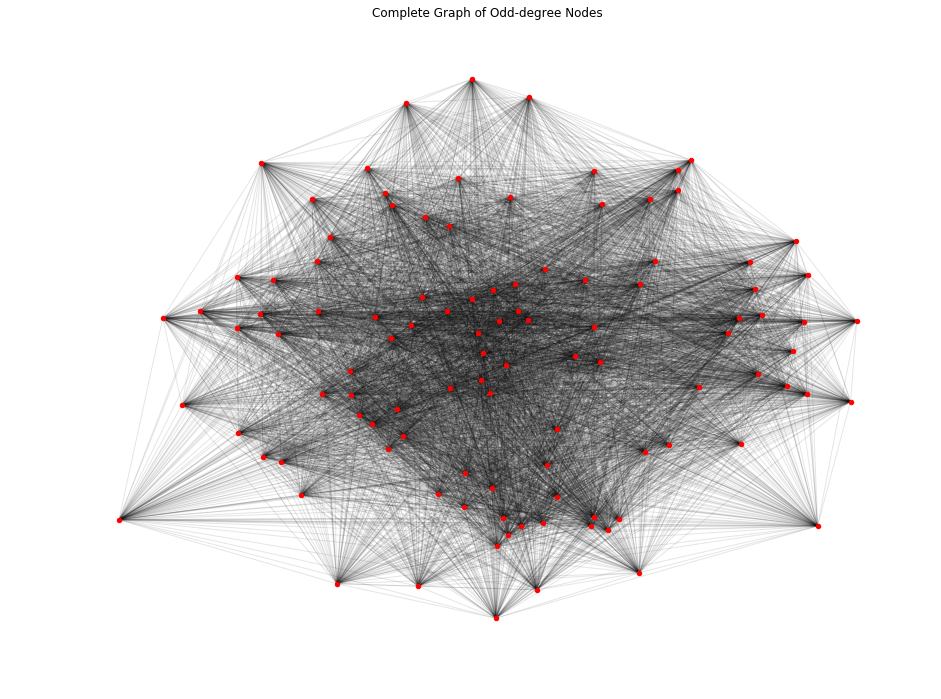

In [21]:
# Plot the complete graph of odd-degree nodes
plt.figure(figsize=(16, 12))
pos_random = nx.random_layout(g_odd_complete)
nx.draw_networkx_nodes(g_odd_complete, node_positions, node_size=20, node_color="red")
nx.draw_networkx_edges(g_odd_complete, node_positions, alpha=0.1)
plt.axis('off')
plt.title('Complete Graph of Odd-degree Nodes')
plt.show()

# 4.4. Compute Minimum Weight Matching

In [22]:
# Compute min weight matching:
odd_matching_dupes = nx.algorithms.max_weight_matching(g_odd_complete, True)
print('Number of edges in matching: {}'.format(len(odd_matching_dupes)))

# Convert matching to list of deduped tuples:
odd_matching = list(pd.unique([tuple(sorted([k, v])) for k, v in odd_matching_dupes.items()]))

# Counts
print('Number of edges in matching (deduped): {}'.format(len(odd_matching))) # Should be half the number (unique pairs only)

Number of edges in matching: 106
Number of edges in matching (deduped): 53


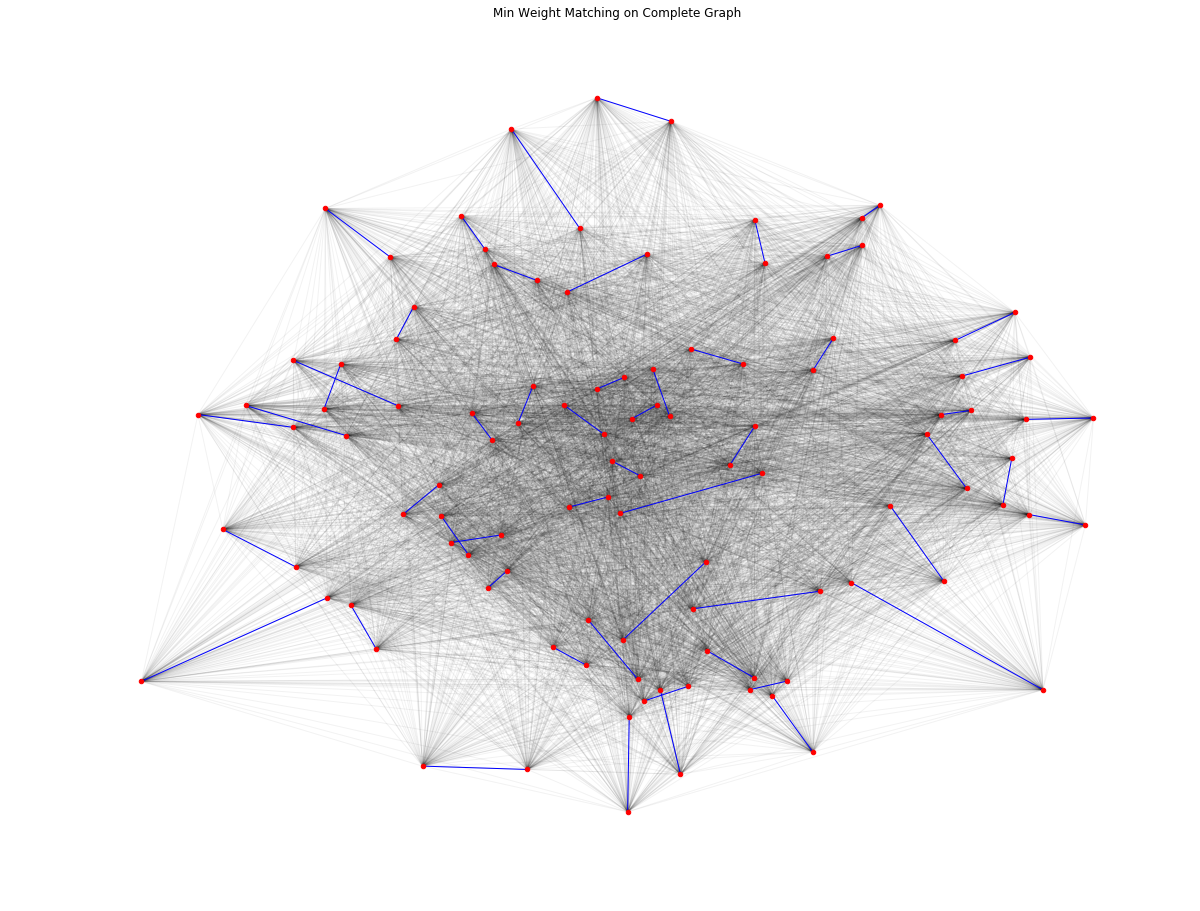

In [23]:
plt.figure(figsize=(16, 12))

# Plot the complete graph of odd-degree nodes
nx.draw(g_odd_complete, pos=node_positions, node_size=20, alpha=0.05)

# Create a new graph to overlay on g_odd_complete with just the edges from the min weight matching
g_odd_complete_min_edges = nx.Graph(odd_matching)
nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, edge_color='blue', node_color='red')

plt.title('Min Weight Matching on Complete Graph')
plt.show()

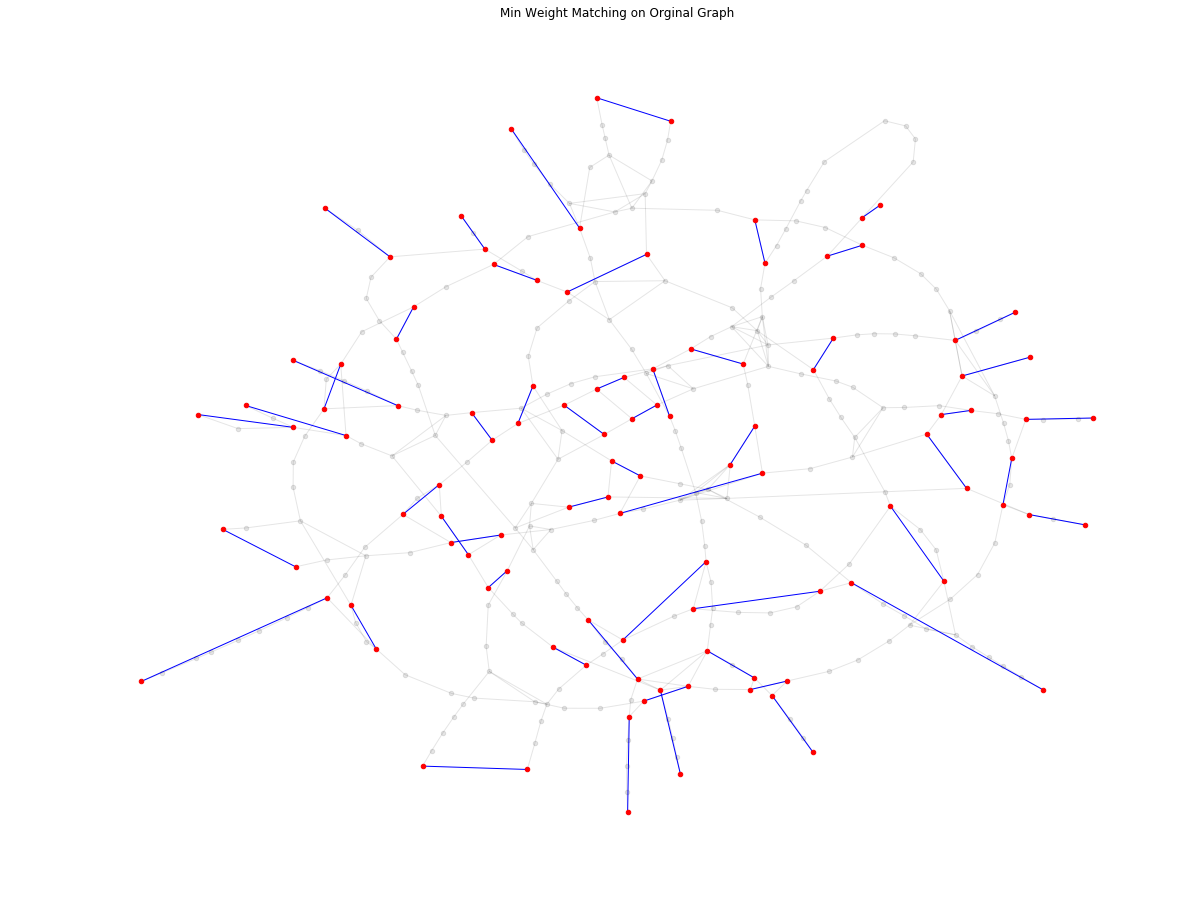

In [24]:
plt.figure(figsize=(16, 12))

# Plot the original trail map graph
nx.draw(g, pos=node_positions, node_size=20, alpha=0.1, node_color='black')

# Plot graph to overlay with just the edges from the min weight matching
nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, alpha=1, node_color='red', edge_color='blue')

plt.title('Min Weight Matching on Orginal Graph')
plt.show()

# 4.5. Add the min-weight edges to the original graph for Eulerian Graph transformation:

In [25]:
def add_augmenting_path_to_graph(graph, min_weight_pairs):
    """
    Add the min weight matching edges to the original graph
    Parameters:
        graph: NetworkX graph (original graph from trailmap)
        min_weight_pairs: list[tuples] of node pairs from min weight matching
    Returns:
        augmented NetworkX graph
    """
    
    # We need to make the augmented graph a MultiGraph so we can add parallel edges
    graph_aug = nx.MultiGraph(graph.copy())
    for pair in min_weight_pairs:
        graph_aug.add_edge(pair[0], 
                           pair[1], 
                           **{'time': nx.dijkstra_path_length(graph, pair[0], pair[1]), 'line': 'augmented'})
    return graph_aug

In [26]:
# Create augmented graph: 
g_aug = add_augmenting_path_to_graph(g, odd_matching) # add the min weight matching edges to g

# Counts
print('Number of edges in original graph: {}'.format(len(g.edges())))
print('Number of edges in augmented graph: {}'.format(len(g_aug.edges())))

Number of edges in original graph: 404
Number of edges in augmented graph: 457


# *5. Compute the Eulerian-Circuit*
- Now that the graph is an Eulerian graph, we can compute the Eulerian circuit;
- We will set the starting point to the station that is further away from the first node (odd_matching edges), to minimize the retracting steps.

In [27]:
def create_eulerian_circuit(graph_augmented, graph_original, starting_node=None):
    """Create the eulerian path using only edges from the original graph."""
    euler_circuit = []
    naive_circuit = list(nx.eulerian_circuit(graph_augmented, source=starting_node))
    
    for edge in naive_circuit:
        edge_data = graph_augmented.get_edge_data(edge[0], edge[1])    
        
        if edge_data[0]['line'] != 'augmented':
            edge_att = graph_original[edge[0]][edge[1]]
            euler_circuit.append((edge[0], edge[1], edge_att)) 
        else: 
            aug_path = nx.shortest_path(graph_original, edge[0], edge[1], weight='time')
            aug_path_pairs = list(zip(aug_path[:-1], aug_path[1:]))
            
            print('Filling in edges for augmented edge: {}'.format(edge))
            print('Augmenting path: {}'.format(' => '.join(map(str, aug_path))))
            print('Augmenting path pairs: {}\n'.format(aug_path_pairs))
            
            for edge_aug in aug_path_pairs:
                edge_aug_att = graph_original[edge_aug[0]][edge_aug[1]]
                euler_circuit.append((edge_aug[0], edge_aug[1], edge_aug_att))
                                      
    return euler_circuit

In [28]:
# Create the Eulerian circuit
euler_circuit = create_eulerian_circuit(g_aug, g,  starting_node=271) # Station 271 = Line 9, Porte de St Cloud

Filling in edges for augmented edge: (271, 355)
Augmenting path: 271 => 104 => 199 => 197 => 141 => 291 => 157 => 306 => 355
Augmenting path pairs: [(271, 104), (104, 199), (199, 197), (197, 141), (141, 291), (291, 157), (157, 306), (306, 355)]

Filling in edges for augmented edge: (245, 267)
Augmenting path: 245 => 153 => 39 => 267
Augmenting path pairs: [(245, 153), (153, 39), (39, 267)]

Filling in edges for augmented edge: (153, 272)
Augmenting path: 153 => 131 => 272
Augmenting path pairs: [(153, 131), (131, 272)]

Filling in edges for augmented edge: (246, 366)
Augmenting path: 246 => 302 => 366
Augmenting path pairs: [(246, 302), (302, 366)]

Filling in edges for augmented edge: (367, 264)
Augmenting path: 367 => 189 => 370 => 286 => 264
Augmenting path pairs: [(367, 189), (189, 370), (370, 286), (286, 264)]

Filling in edges for augmented edge: (354, 57)
Augmenting path: 354 => 30 => 150 => 57
Augmenting path pairs: [(354, 30), (30, 150), (150, 57)]

Filling in edges for augmen

In [29]:
print('Length of Eulerian circuit: {}'.format(len(euler_circuit)))

Length of Eulerian circuit: 532


# 5.1. Final CPP solution:

In [30]:
# Preview first 5 directions of CPP solution
for i, edge in enumerate(euler_circuit[0:5]):
    print(i, edge)

0 (271, 104, {'time': 40, 'line': '9', 'color': 'olive'})
1 (104, 199, {'time': 62, 'line': '9', 'color': 'olive'})
2 (199, 197, {'time': 28, 'line': '9', 'color': 'olive'})
3 (197, 141, {'time': 49, 'line': '9', 'color': 'olive'})
4 (141, 291, {'time': 37, 'line': '9', 'color': 'olive'})


# 5.2. Add the end-loops from line 7b and 10 to the end result:

In [31]:
total_time_endLoops = sum(nx.get_edge_attributes(g_7b,'time').values())+sum(nx.get_edge_attributes(g_10,'time').values())
total_edges_endLoops = len(g_7b.edges())+len(g_10.edges()) 
total_nodes_endLoops = len(g_7b.nodes())+len(g_10.nodes()) 

In [32]:
# End results, including the loops:
total_time_of_circuit = sum([edge[2]['time'] for edge in euler_circuit])+total_time_endLoops
total_time_on_orig_metro_net = sum(nx.get_edge_attributes(g, 'time').values())+total_time_endLoops
_vcn = pd.value_counts(pd.value_counts([(e[0]) for e in euler_circuit]), sort=False)
node_visits = pd.DataFrame({'n_visits': _vcn.index, 'n_nodes': _vcn.values})
node_visits['n_nodes'][0]=node_visits['n_nodes'][0]+total_nodes_endLoops-2 # add the end-loop nodes (minus 2), to the once visited nodes
node_visits['n_nodes'][1]=node_visits['n_nodes'][1]+2 # the two nodes where the loops start to the twice visited nodes

_vce = pd.value_counts(pd.value_counts([sorted(e)[0] + sorted(e)[1] for e in nx.MultiDiGraph(euler_circuit).edges()]))
edge_visits = pd.DataFrame({'n_visits': _vce.index, 'n_edges': _vce.values})
edge_visits['n_edges'][0]=edge_visits['n_edges'][0]+total_edges_endLoops # add end-loop edges, to the one visit line

# Printing stats
print('Time needed: {0:.2f} hours'.format(total_time_of_circuit/(60*60)))
print('Total time of the original metro network: {0:.2f} hours'.format(total_time_on_orig_metro_net/(60*60)))
print('Time spent on retracing edges: {0:.2f} hours'.format((total_time_of_circuit-total_time_on_orig_metro_net)/(60*60)))
print('Percent of path retraced: {0:.2f}%\n'.format((1-total_time_of_circuit/total_time_on_orig_metro_net)*-100))

print('Number of edges in circuit: {}'.format(len(euler_circuit)+total_edges_endLoops))
print('Number of edges in original graph: {}'.format(len(g.edges())+total_edges_endLoops))
print('Number of nodes in original graph: {}\n'.format(len(g.nodes())+total_nodes_endLoops-2)) # remove the end-loop nodes

print('Number of edges traversed more than once: {}\n'.format(len(euler_circuit)-len(g.edges())))  

print('Number of times visiting each node:')
print(node_visits.to_string(index=False))

print('\nNumber of times visiting each edge:')
print(edge_visits.to_string(index=False))

Time needed: 9.92 hours
Total time of the original metro network: 7.91 hours
Time spent on retracing edges: 2.01 hours
Percent of path retraced: 25.39%

Number of edges in circuit: 544
Number of edges in original graph: 416
Number of nodes in original graph: 323

Number of edges traversed more than once: 128

Number of times visiting each node:
n_visits  n_nodes
       1      131
       2      168
       3       25
       4        1

Number of times visiting each edge:
n_visits  n_edges
       1      161
       2       99
       3       33
       4       14
       5        6


# *6. Conclusion*
By transforming the Parisian Metro network into a fully connected undirected graph plus two fully connected directed graphs (end-loops line 7b and 10), it was possible apply the CPP solution and reach a circuit of 9.92 hours, which allow us two visit all intramural Parisian Metro stations within a day.

# References:
 - http://brooksandrew.github.io/simpleblog/articles/intro-to-graph-optimization-solving-cpp/
 - https://networkx.github.io/documentation/networkx-2.0/
 - https://en.wikipedia.org/wiki/Route_inspection_problem
 - https://en.wikipedia.org/wiki/Eulerian_path
 - https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm
 - https://en.wikipedia.org/wiki/Hamiltonian_path
 - https://www.ratp.fr/plan-metro